# Outline

1) Objective

2) Data Exploration

    2.1) Descriptive Statistics
    
    2.2) Data Visualizations
    
3) Correlation Analysis

4) Linear Regression Models

5) Model Validation

6) Predictions

7) Conclusion

# 1 Objective
To accurately predict the number of wins based on past data in different time periods.

We aim to determine how teams are able win in different time periods:
- before 1920
- 1920-1959
- 1960-1989
- 1990-2010

# 2 Data Exploration

In [2]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np
from pandas import Series, DataFrame
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot
from scipy.stats import pearsonr
# allow plots to appear directly in the notebook
%matplotlib inline
sns.set()

In [3]:
baseball=pd.read_csv(r'baseball_teams.csv', header=0)
baseball.columns=baseball.columns.str.replace(' ', '_')
baseball_1960_2015=pd.DataFrame(baseball[1343:])

In [4]:
baseball.var()

Year_                  1.723834e+03
Final_Standing         5.398253e+00
Games_Played           5.395051e+02
Unnamed:_7             2.207763e+01
Games_Won              3.111838e+02
Games_Lost             3.019976e+02
Unnamed:_10            1.493375e-01
League_Win             8.838555e-02
World_Series           4.515867e-02
Runs_Scored            1.842487e+04
At_Bats                5.633278e+05
Hits                   4.835232e+04
Doubles                3.444821e+03
Triples                4.958914e+02
Home_Runs              3.778352e+03
Walks                  1.757902e+04
Strike_Outs            8.914511e+04
Stolen_Bases           5.014208e+03
Caught_Stealing        4.667211e+02
Hit_By_Pitch           1.832643e+02
Sacrifice_Fly          7.431096e+01
Runs_Against           1.820206e+04
Earned_Runs            2.159666e+04
Earned_Run_Average     5.815132e-01
Complete_Games         1.500238e+03
Shutout                2.598276e+01
Saves                  2.650807e+02
Infield_Put_Outs       3.981

In [16]:
baseball.head()

,Year_,League,Team_,Franchise_,Division,Final_Standing,Games_Played,Unnamed:_7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN


I'll be choosing 8 variables to explore descriptive statistics and show visualizations on each variable.

Variables: 
    - Runs Scored
    - Hits
    - Walks
    - Stolen Bases
    - Earned Run Average
    - Hits Allowed
    - Walks Allowed
    - Fielding Percentage

In [19]:
baseball.isnull().sum()
baseball_1960_2015.isnull().sum()

Year_                    0
League                   0
Team_                    0
Franchise_               0
Division               174
Final_Standing           0
Games_Played             0
Unnamed:_7               0
Games_Won                0
Games_Lost               0
Unnamed:_10            202
League_Win              28
World_Series            28
Runs_Scored              0
At_Bats                  0
Hits                     0
Doubles                  0
Triples                  0
Home_Runs                0
Walks                    0
Strike_Outs              0
Stolen_Bases             0
Caught_Stealing          0
Hit_By_Pitch           982
Sacrifice_Fly          982
Runs_Against             0
Earned_Runs              0
Earned_Run_Average       0
Complete_Games           0
Shutout                  0
Saves                    0
Infield_Put_Outs         0
Hits_Allowed             0
Home_Run_Allowed         0
Walks_Allowed            0
Strikeouts_Allowed       0
Errors                   0
D

ALthough there are quite a bit of null values in the data set, these variables will not be used for the building of the models

# 2.1 Descriptive Statistics 

In [5]:
baseball_1960_2015[['Runs_Scored','Hits','Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed','Fielding_Percentage']].describe()

,Runs_Scored,Hits,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,701.374145,1407.980848,520.385773,99.850205,3.995793,1408.006840,520.385089,0.977182
std,99.263304,121.818498,75.809546,40.843788,0.587223,123.942746,74.321711,0.006115
min,329.000000,797.000000,275.000000,16.000000,2.450000,827.000000,268.000000,0.960000
25%,640.000000,1355.000000,471.000000,69.000000,3.580000,1350.000000,474.000000,0.970000
50%,701.000000,1415.000000,519.000000,95.000000,3.955000,1418.000000,519.000000,0.980000
75%,765.000000,1482.000000,569.000000,125.000000,4.370000,1484.000000,569.750000,0.981000
max,1009.000000,1684.000000,775.000000,341.000000,6.380000,1734.000000,784.000000,0.991000


# 2.2 Visualizations of histograms, boxplots, modes, and comments about the distribution of each variable

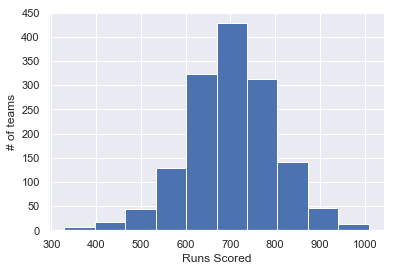

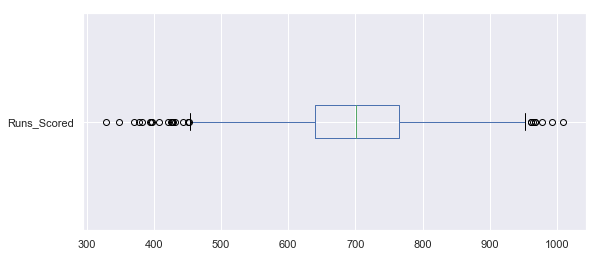

Mode    Runs_Scored
0          691


In [6]:
baseball_1960_2015['Runs_Scored'].hist()
plt.xlabel('Runs Scored')
plt.ylabel('# of teams')
plt.show()
#
baseball_1960_2015.boxplot('Runs_Scored', figsize=(9,4), vert=False)
plt.show()
#
#does look symmetric
print('Mode',pd.DataFrame(baseball_1960_2015['Runs_Scored']).mode())
#one mode
#widely spread of data but most datapoints lies in the middle
#there are a lot of outliers

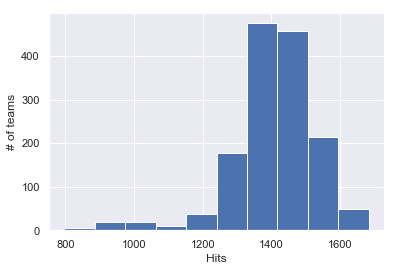

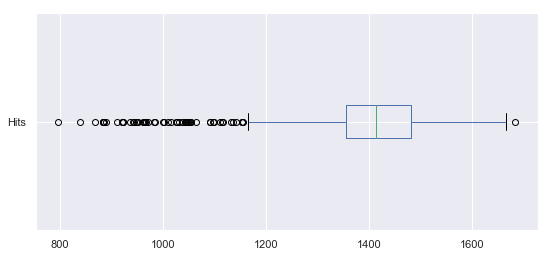

Mode    Hits
0  1400


In [7]:
baseball_1960_2015['Hits'].hist()
plt.xlabel('Hits')
plt.ylabel('# of teams')
plt.show()
#
baseball_1960_2015.boxplot('Hits', figsize=(9,4), vert=False)
plt.show()
#
#negatively skewed
print('Mode',pd.DataFrame(baseball_1960_2015['Hits']).mode())
#one mode
#widely spread of data but most datapoints lies on the right side
#there are a lot of outliers

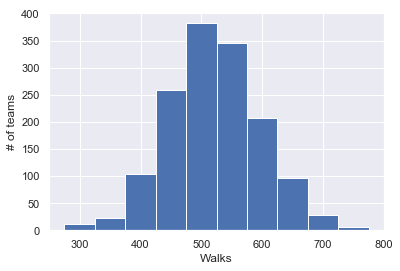

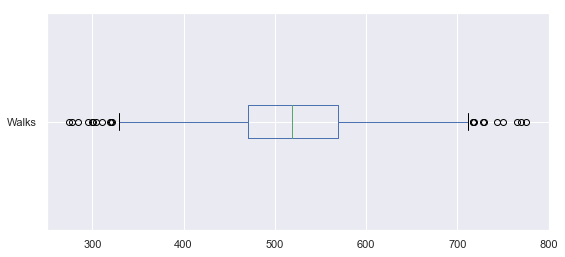

Mode    Walks
0    500
1    503
2    509


In [8]:
baseball_1960_2015['Walks'].hist()
plt.xlabel('Walks')
plt.ylabel('# of teams')
plt.show()
#
baseball_1960_2015.boxplot('Walks', figsize=(9,4), vert=False)
plt.show()
#
#looks symmetric
print('Mode',pd.DataFrame(baseball_1960_2015['Walks']).mode())
#3 modes
#widely spread of data but most datapoints lies on the right side
#there is a moderate amount of outliers

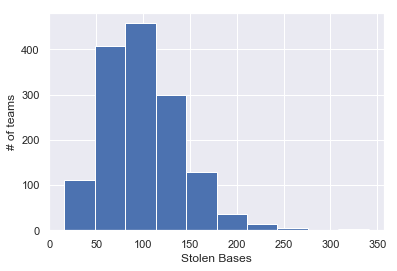

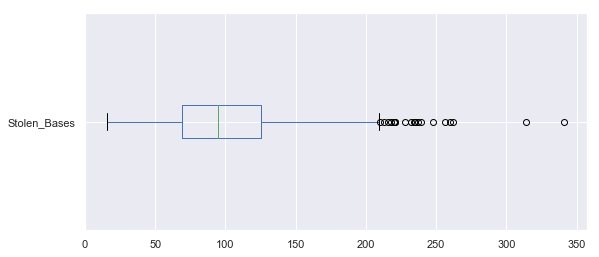

Mode    Stolen_Bases
0         100.0


In [9]:
baseball_1960_2015['Stolen_Bases'].hist()
plt.xlabel('Stolen Bases')
plt.ylabel('# of teams')
plt.show()
#
baseball_1960_2015.boxplot('Stolen_Bases', figsize=(9,4), vert=False)
plt.show()
#
#positively skewed
print('Mode',pd.DataFrame(baseball_1960_2015['Stolen_Bases']).mode())
#one mode
#widely spread of data but most datapoints lies on the left side
#there is a moderate amount of outliers

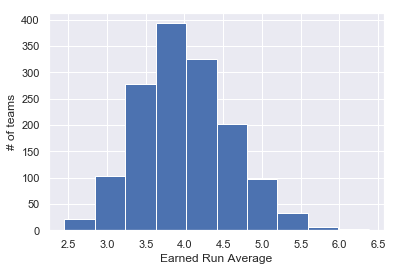

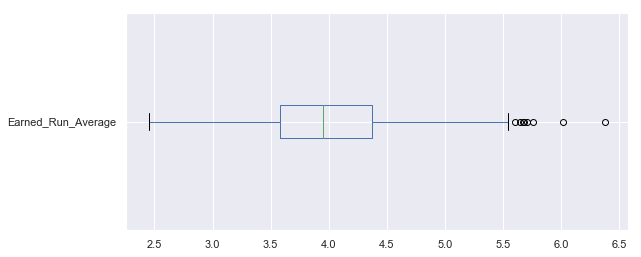

Mode    Earned_Run_Average
0                3.84


In [10]:
baseball_1960_2015['Earned_Run_Average'].hist()
plt.xlabel('Earned Run Average')
plt.ylabel('# of teams')
plt.show()
baseball_1960_2015.boxplot('Earned_Run_Average', figsize=(9,4), vert=False)
plt.show()
#it's symmetric
print('Mode',pd.DataFrame(baseball_1960_2015['Earned_Run_Average']).mode())
#one mode
#widely spread of data but most points lies in the middle
#a small amount of outliers

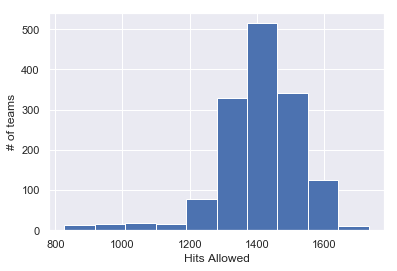

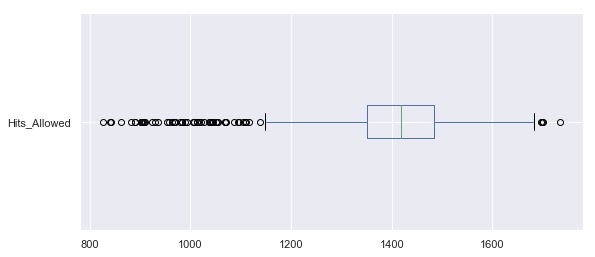

Mode    Hits_Allowed
0          1402
1          1443


In [11]:
baseball_1960_2015['Hits_Allowed'].hist()
plt.xlabel('Hits Allowed')
plt.ylabel('# of teams')
plt.show()
#
baseball_1960_2015.boxplot('Hits_Allowed', figsize=(9,4), vert=False)
plt.show()
#
#appears to be symmetric
print('Mode',pd.DataFrame(baseball_1960_2015['Hits_Allowed']).mode())
#one mode
#widely spread of data but most datapoints lies on the right side
#there are a lot of outliers

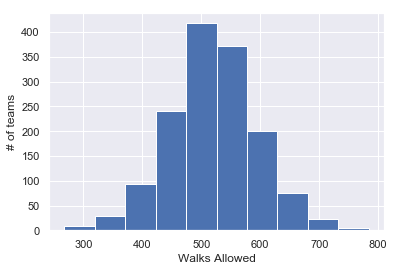

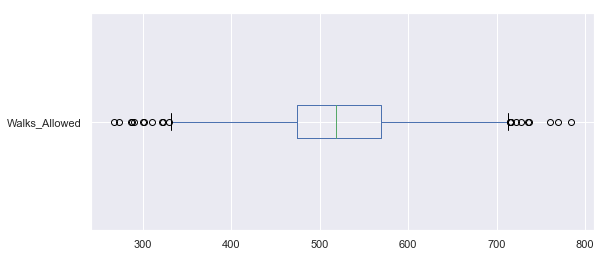

Mode    Walks_Allowed
0            504


In [12]:
baseball_1960_2015['Walks_Allowed'].hist()
plt.xlabel('Walks Allowed')
plt.ylabel('# of teams')
plt.show()
baseball_1960_2015.boxplot('Walks_Allowed', figsize=(9,4), vert=False)
plt.show()
#it's almost symmetric
print('Mode',pd.DataFrame(baseball_1960_2015['Walks_Allowed']).mode())
#one mode
#widely spread of data but most points lies in the middle
#there's a moderate amount of outliers

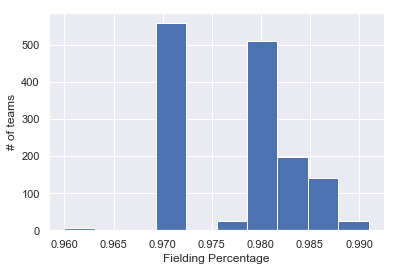

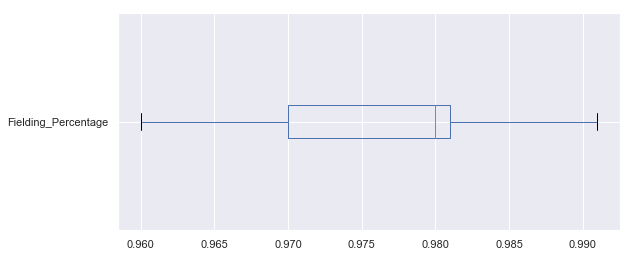

Mode    Fielding_Percentage
0                 0.97


In [13]:
baseball_1960_2015['Fielding_Percentage'].hist()
plt.xlabel('Fielding Percentage')
plt.ylabel('# of teams')
plt.show()
baseball_1960_2015.boxplot('Fielding_Percentage', figsize=(9,4), vert=False)
plt.show()
#positively skewed
print('Mode',pd.DataFrame(baseball_1960_2015['Fielding_Percentage']).mode())
#one mode
#widely spread of data but most points lies on the right side
#no outliers

## Normal Distribution Validity
Variables: Run scored, Hits, Walks, Stolen Bases, Earned Run Average, Hits Allowed, Walks Allowed, Fielding Percentage


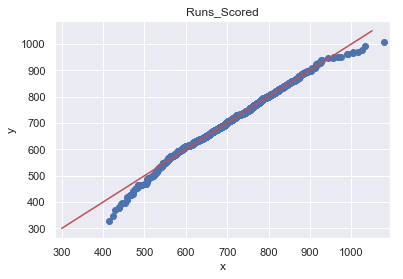

In [14]:
#e
x=baseball_1960_2015['Runs_Scored']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(300,1050,baseball_1960_2015['Runs_Scored'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Runs_Scored')
plt.show()
#looks normally distributed

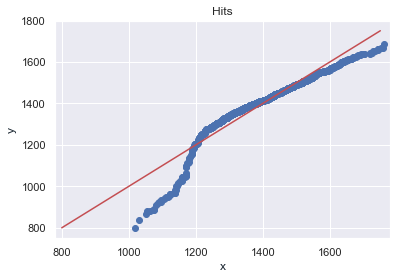

In [15]:
x=baseball_1960_2015['Hits']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(800,1750,baseball_1960_2015['Hits'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Hits')
plt.show()
#Doesn't look normally distributed

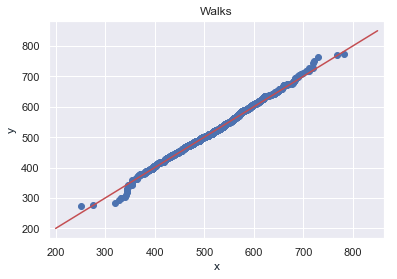

In [23]:
x=baseball_1960_2015['Walks']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(200,850,baseball_1960_2015['Walks'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Walks')
plt.show()
#looks very normally distributed

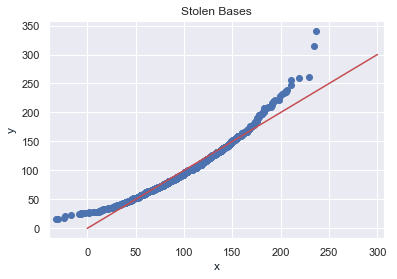

In [24]:
x=baseball_1960_2015['Stolen_Bases']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(0,300,baseball_1960_2015['Stolen_Bases'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Stolen Bases')
plt.show()
#doesn't look normally distributed

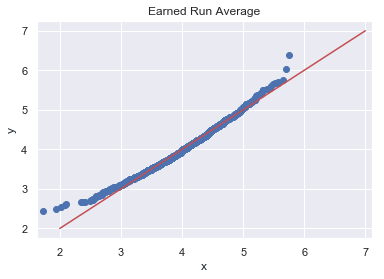

In [25]:
x=baseball_1960_2015['Earned_Run_Average']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(2,7,baseball_1960_2015['Earned_Run_Average'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Earned Run Average')
plt.show()
#looks very normally distributed

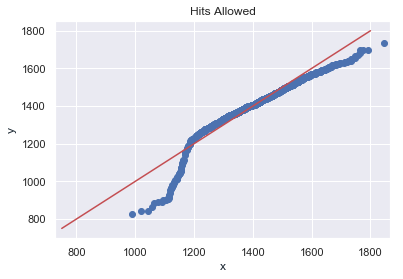

In [26]:
x=baseball_1960_2015['Hits_Allowed']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(750,1800,baseball_1960_2015['Hits_Allowed'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Hits Allowed')
plt.show()
#doesn't looks normally distributed

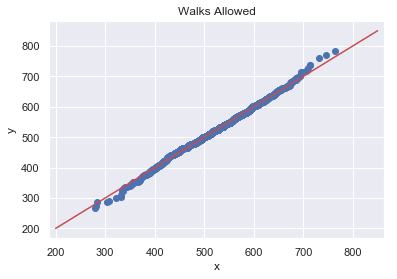

In [27]:
x=baseball_1960_2015['Walks_Allowed']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(200,850,baseball_1960_2015['Walks_Allowed'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Walks Allowed')
plt.show()
#looks very normally distributed

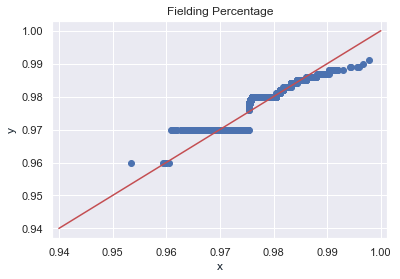

In [28]:
x=baseball_1960_2015['Fielding_Percentage']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(0.94,1,baseball_1960_2015['Fielding_Percentage'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Fielding Percentage')
plt.show()
#doesn't look normally distributed

# 3: Correlation Analysis 
Correlation analysis of pairs of data fields using scatter plots and pearson correlation
Years: 1960 to 2010

In [29]:
baseball_1960_2010=pd.DataFrame(baseball[1343:2655])

In [30]:
wins=baseball_1960_2010['Games_Won']
runs_scored=baseball_1960_2010['Runs_Scored']
runs_against=baseball_1960_2010['Runs_Against']
scored_vs_against=baseball_1960_2010['Runs_Scored']-baseball_1960_2010['Runs_Against']
losses=baseball_1960_2010['Games_Lost']

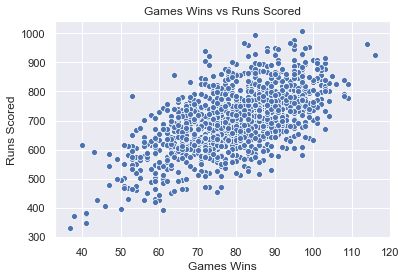

0.5958277670854701

In [31]:
sns.scatterplot(wins,runs_scored)
plt.xlabel('Games Wins')
plt.ylabel('Runs Scored')
plt.title('Games Wins vs Runs Scored')
plt.show()
pearsonr(wins,runs_scored)[0]
#moderately correlated but not significant

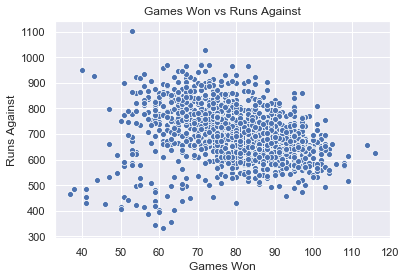

-0.24815754285361902

In [32]:
#b
sns.scatterplot(wins,runs_against)
plt.xlabel('Games Won')
plt.ylabel('Runs Against')
plt.title('Games Won vs Runs Against')
plt.show()
pearsonr(wins,runs_against)[0]
#negative weak correlation 

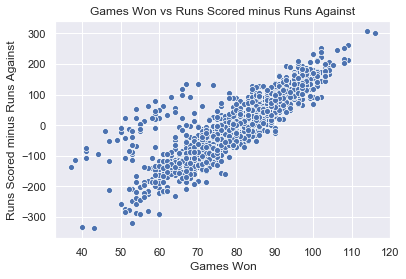

0.8504113793468355

In [33]:
#c
sns.scatterplot(wins,scored_vs_against)
plt.xlabel('Games Won')
plt.ylabel('Runs Scored minus Runs Against')
plt.title('Games Won vs Runs Scored minus Runs Against')
plt.show()
pearsonr(wins,scored_vs_against)[0]
#strong significant correlation
#this means that net amount of runs has a strong affect on winning games

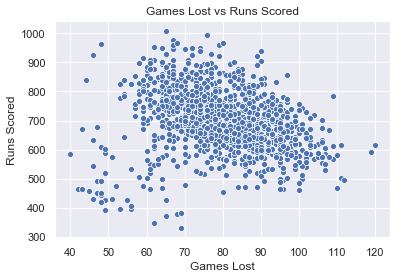

0.5958277670854701

In [34]:
#d
sns.scatterplot(losses,runs_scored)
plt.xlabel('Games Lost')
plt.ylabel('Runs Scored')
plt.title('Games Lost vs Runs Scored')
plt.show()
pearsonr(wins,runs_scored)[0]
#moderate correlation but not significant

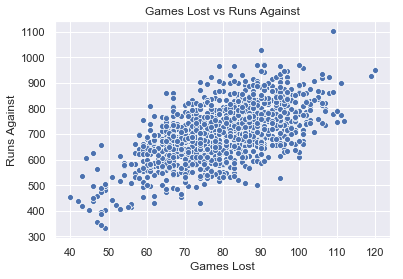

0.6111768041759512

In [35]:
#e
sns.scatterplot(losses,runs_against)
plt.xlabel('Games Lost')
plt.ylabel('Runs Against')
plt.title('Games Lost vs Runs Against')
plt.show()
pearsonr(losses,runs_against)[0]
#moderate correlation but not significant

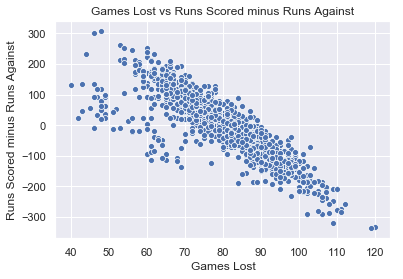

-0.8493581790868782

In [50]:
#f
sns.scatterplot(losses,scored_vs_against)
plt.xlabel('Games Lost')
plt.ylabel('Runs Scored minus Runs Against')
plt.title('Games Lost vs Runs Scored minus Runs Against')
plt.show()
pearsonr(losses,scored_vs_against)[0]
#strong, significant, negative correlation
#the lower the net difference between runs score and runs against, the more games a team is going to lose

# 4: Linear Regression Models

In [13]:
baseball_1920=pd.DataFrame(baseball[:703])
baseball_1920_1960=pd.DataFrame(baseball[703:1343])
baseball_1960_1990=pd.DataFrame(baseball[1343:2047])
baseball_1990_2010=pd.DataFrame(baseball[2047:2655])
baseball.var()

Year_                  1.723834e+03
Final_Standing         5.398253e+00
Games_Played           5.395051e+02
Unnamed:_7             2.207763e+01
Games_Won              3.111838e+02
Games_Lost             3.019976e+02
Unnamed:_10            1.493375e-01
League_Win             8.838555e-02
World_Series           4.515867e-02
Runs_Scored            1.842487e+04
At_Bats                5.633278e+05
Hits                   4.835232e+04
Doubles                3.444821e+03
Triples                4.958914e+02
Home_Runs              3.778352e+03
Walks                  1.757902e+04
Strike_Outs            8.914511e+04
Stolen_Bases           5.014208e+03
Caught_Stealing        4.667211e+02
Hit_By_Pitch           1.832643e+02
Sacrifice_Fly          7.431096e+01
Runs_Against           1.820206e+04
Earned_Runs            2.159666e+04
Earned_Run_Average     5.815132e-01
Complete_Games         1.500238e+03
Shutout                2.598276e+01
Saves                  2.650807e+02
Infield_Put_Outs       3.981

In [14]:
baseballvars=baseball.drop(['Year_','Final_Standing','Games_Played','Unnamed:_7','Unnamed:_10','League_Win','World_Series','Attendance'],axis=1)

In [15]:
baseballvars.var()

Games_Won                 311.183777
Games_Lost                301.997614
Runs_Scored             18424.870814
At_Bats                563327.841329
Hits                    48352.317144
Doubles                  3444.821488
Triples                   495.891442
Home_Runs                3778.351892
Walks                   17579.016694
Strike_Outs             89145.107306
Stolen_Bases             5014.208481
Caught_Stealing           466.721139
Hit_By_Pitch              183.264283
Sacrifice_Fly              74.310956
Runs_Against            18202.056977
Earned_Runs             21596.655915
Earned_Run_Average          0.581513
Complete_Games           1500.237600
Shutout                    25.982756
Saves                     265.080717
Infield_Put_Outs       398157.140875
Hits_Allowed            48189.497615
Home_Run_Allowed         3392.480280
Walks_Allowed           17394.980627
Strikeouts_Allowed      87858.817262
Errors                  11590.125163
Double_Plays              859.824474
F

In [16]:
baseballoffvariables=baseballvars[['Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs','Walks','Strike_Outs','Stolen_Bases','Caught_Stealing','Hit_By_Pitch','Sacrifice_Fly']]

In [17]:
baseballdefvariables=baseballvars[['Earned_Runs','Earned_Run_Average','Complete_Games','Shutout','Saves','Infield_Put_Outs','Hits_Allowed','Walks_Allowed']]

In [17]:
#plt.subplots(figsize=(20,15))
#sns.heatmap(baseballoffvariables.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [19]:
lin_baseball_1920 = smf.ols(formula = 'Games_Won ~ Runs_Scored + Hits + Walks + Stolen_Bases + Earned_Run_Average + Hits_Allowed + Walks_Allowed + Fielding_Percentage ', data=baseball_1920).fit()

lin_baseball_1920_1960 = smf.ols(formula = 'Games_Won ~ Runs_Scored + Hits + Walks + Stolen_Bases + Earned_Run_Average + Hits_Allowed + Walks_Allowed + Fielding_Percentage', data=baseball_1920_1960).fit()

lin_baseball_1960_1990 = smf.ols(formula = 'Games_Won ~ Runs_Scored + Hits + Walks + Stolen_Bases + Earned_Run_Average + Hits_Allowed + Walks_Allowed + Fielding_Percentage', data=baseball_1960_1990).fit()

lin_baseball_1990_2010 = smf.ols(formula = 'Games_Won ~ Runs_Scored + Hits + Walks + Stolen_Bases + Earned_Run_Average + Hits_Allowed + Walks_Allowed + Fielding_Percentage', data=baseball_1990_2010).fit()

In [20]:
#c
#offensive measures:
#run scored, hits, walks, stolen bases
#defensive measures:
#earned runs, hits allowed, walks allowed, fielding percentage

Offensive variables: Runs Scored, Hits, Walks, Stolen Bases

Defensive variables: Earned Runs Average, Hits Allowed, Walks Allowed, Fielding Percentage

I chose these variables because I believed these are the main reasons why a team is able to win games.
E.g, in order to score runs you need hitters to get on base via hits or walks, and to minimize the runs against you need a very strong pitching staff and fielding defense which can be represented by low earned run average and a high fielding percentage.

# 5: Model Validation

In [21]:
lin_baseball_1920.summary()
#r^2 and adj r^2 are strongly significant
#f-statistic is very far from 1, which can help make this model more acceptable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     538.6
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.60e-254
Time:                        13:28:19   Log-Likelihood:                -1875.2
No. Observations:                 559   AIC:                             3768.
Df Residuals:                     550   BIC:                             3807.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -102.0836     20.311     -5.026      0.000    -141.981     -62.187
Runs_Scored             0.0148      0.005      2.762      0.006       0.004       0.025
Hits                    0.0630      0.006     11.225      0.000       0.052       0.074
Walks                   0.0499      0.005     10.171      0.000       0.040       0.059
Stolen_Bases            0.0190      0.005      3.789      0.000       0.009       0.029
Earned_Run_Average     -6.2347      0.566    -11.012      0.000      -7.347      -5.123
Hits_Allowed           -0.0456      0.004    -12.928      0.000      -0.053      -0.039
Walks_Allowed          -0.0332      0.004     -7.986      0.000      -0.041      -0.025
Fielding_Percentage   160.5092     23.652      6.786      0.000     114.049     206.969
==============================================================================
Omnibus:                       15.461   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.591
Skew:                           0.254   Prob(JB):                     2.05e-05
Kurtosis:                       3.818   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
lin_baseball_1920_1960.summary()
#r^2 and adj r^2 are strongly significant
#f-statistic is very far from 1, which can help make this model more acceptable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     806.0
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:28:19   Log-Likelihood:                -1838.0
No. Observations:                 640   AIC:                             3694.
Df Residuals:                     631   BIC:                             3734.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -169.7259     36.794     -4.613      0.000    -241.979     -97.473
Runs_Scored             0.0923      0.004     20.819      0.000       0.084       0.101
Hits                    0.0037      0.004      0.871      0.384      -0.005       0.012
Walks                   0.0036      0.003      1.154      0.249      -0.003       0.010
Stolen_Bases           -0.0044      0.007     -0.677      0.499      -0.017       0.008
Earned_Run_Average    -12.2807      0.685    -17.916      0.000     -13.627     -10.935
Hits_Allowed           -0.0197      0.004     -5.112      0.000      -0.027      -0.012
Walks_Allowed          -0.0083      0.003     -2.676      0.008      -0.014      -0.002
Fielding_Percentage   264.0060     36.332      7.267      0.000     192.660     335.352
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.182
Skew:                          -0.040   Prob(JB):                        0.913
Kurtosis:                       3.022   Cond. No.                     6.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
lin_baseball_1960_1990.summary()
#r^2 and adj r^2 are strongly significant
#f-statistic is very far from 1, which can help make this model more acceptable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     747.5
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:28:19   Log-Likelihood:                -1992.7
No. Observations:                 704   AIC:                             4003.
Df Residuals:                     695   BIC:                             4044.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -184.3623     33.155     -5.561      0.000    -249.459    -119.266
Runs_Scored             0.1076      0.005     23.283      0.000       0.099       0.117
Hits                    0.0019      0.004      0.507      0.612      -0.006       0.009
Walks                   0.0030      0.003      0.915      0.360      -0.003       0.009
Stolen_Bases            0.0030      0.003      0.888      0.375      -0.004       0.010
Earned_Run_Average    -17.8196      0.550    -32.373      0.000     -18.900     -16.739
Hits_Allowed            0.0018      0.003      0.661      0.509      -0.004       0.007
Walks_Allowed       -5.669e-05      0.003     -0.021      0.983      -0.005       0.005
Fielding_Percentage   258.4848     33.863      7.633      0.000     191.999     324.971
==============================================================================
Omnibus:                        1.684   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.576
Skew:                          -0.019   Prob(JB):                        0.455
Kurtosis:                       2.771   Cond. No.                     6.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
lin_baseball_1990_2010.summary()
#r^2 and adj r^2 are strongly significant
#f-statistic is very far from 1, which can help make this model more acceptable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     617.3
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.68e-283
Time:                        13:28:19   Log-Likelihood:                -1711.1
No. Observations:                 608   AIC:                             3440.
Df Residuals:                     599   BIC:                             3480.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -201.8227     36.284     -5.562      0.000    -273.082    -130.564
Runs_Scored             0.0902      0.005     19.817      0.000       0.081       0.099
Hits                    0.0038      0.004      0.966      0.334      -0.004       0.011
Walks                   0.0082      0.003      2.516      0.012       0.002       0.015
Stolen_Bases            0.0132      0.005      2.678      0.008       0.004       0.023
Earned_Run_Average    -14.9807      0.511    -29.343      0.000     -15.983     -13.978
Hits_Allowed           -0.0006      0.003     -0.241      0.810      -0.006       0.005
Walks_Allowed          -0.0056      0.003     -1.958      0.051      -0.011    1.83e-05
Fielding_Percentage   277.1358     37.107      7.469      0.000     204.260     350.011
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.741
Skew:                          -0.027   Prob(JB):                        0.690
Kurtosis:                       2.838   Cond. No.                     7.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 6: Predictions

Using the historic data, I will try to accurately predict the number of wins for the following teams

1887-1920: tbd

1920-1960: tbd

1960-1990: tbd

1990-2015: New York Yankees (2012 & 2015), Toronto Blue Jays (2012 & 2015)

In [25]:
Yankees=baseball_1990_2010[baseball_1990_2010['Franchise_']=='NYY']
Blue_Jays=baseball_1990_2010[baseball_1990_2010['Franchise_']=='TOR']

In [26]:
#Yankees
#Blue_Jays
x_2012=baseball[baseball['Year_'] == 2012]
x_2015=baseball[baseball['Year_'] == 2015]
#
x_Tor=x_2012[x_2012['Franchise_']=='TOR']
y_Tor=x_2015[x_2015['Franchise_']=='TOR']
x_NYY=x_2012[x_2012['Franchise_']=='NYY']
y_NYY=x_2015[x_2015['Franchise_']=='NYY']

In [27]:
x_NYY[['Runs_Scored', 'Home_Runs', 'Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed', 'Fielding_Percentage']]

,Runs_Scored,Home_Runs,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
2702,804,245,565,93.0,3.84,1401,431,0.987


In [28]:
x_Tor[['Runs_Scored', 'Home_Runs', 'Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed', 'Fielding_Percentage']]

,Runs_Scored,Home_Runs,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
2713,716,198,473,123.0,4.64,1439,574,0.984


In [29]:
y_NYY[['Runs_Scored', 'Home_Runs', 'Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed', 'Fielding_Percentage']]

,Runs_Scored,Home_Runs,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
2781,764,212,554,63.0,4.03,1416,474,0.985


In [30]:
y_Tor[['Runs_Scored', 'Home_Runs', 'Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed', 'Fielding_Percentage']]

,Runs_Scored,Home_Runs,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
2780,891,232,570,88.0,3.8,1353,397,0.985


In [31]:
Yankees_2012=pd.DataFrame({'Runs_Scored':[804], 'Hits':[1462], 'Walks':[565], 'Stolen_Bases':[93], 'Earned_Run_Average':[3.84],'Hits_Allowed':[1401],'Walks_Allowed':[431],'Fielding_Percentage':[0.987]})
#Yankees_2012=pd.DataFrame({'Runs_Scored':[804], 'Hits':[1462], 'Walks':[565], 'Stolen_Bases':[93], 'Earned_Run_Average':[3.84],'Fielding_Percentage':[0.987]})

BlueJays_2012=pd.DataFrame({'Runs_Scored':[716], 'Hits':[1346], 'Walks':[473], 'Stolen_Bases':[123], 'Earned_Run_Average':[4.64],'Hits_Allowed':[1439],'Walks_Allowed':[574],'Fielding_Percentage':[0.984]})

Yankees_2015=pd.DataFrame({'Runs_Scored':[764], 'Hits':[1397], 'Walks':[554], 'Stolen_Bases':[63], 'Earned_Run_Average':[4.03],'Hits_Allowed':[1416],'Walks_Allowed':[474],'Fielding_Percentage':[0.985]})

BlueJays_2015=pd.DataFrame({'Runs_Scored':[891], 'Hits':[1480], 'Walks':[570],'Stolen_Bases':[88],'Earned_Run_Average':[3.8],'Hits_Allowed':[1353],'Walks_Allowed':[397],'Fielding_Percentage':[0.985]})

In [33]:
lin_baseball_1990_2010 = smf.ols(formula = 'Games_Won ~ Runs_Scored + Hits + Walks + Stolen_Bases + Earned_Run_Average + Hits_Allowed + Walks_Allowed + Fielding_Percentage', data=baseball_1990_2010).fit()
lin_baseball_1990_2010.predict(Yankees_2012) 

0    94.806616
dtype: float64

In [94]:
lin_baseball_1990_2010.predict(BlueJays_2012)

0    72.426277
dtype: float64

In [95]:
lin_baseball_1990_2010.predict(Yankees_2015)

0    86.814226
dtype: float64

In [96]:
lin_baseball_1990_2010.predict(BlueJays_2015)

0    102.966246
dtype: float64

# 7: Conclusions

Every prediction was very accurate except for the BlueJays_2015.

This may be because of how good the BlueJays_2015 batters were as that year they were one of the best hoffensive teams, also backed up by a very strong starting pitchers rotation.

Root Mean Square Error

In [835]:
#ii
X=x_NYY[['Runs_Scored','Hits','Walks','Stolen_Bases','Earned_Run_Average','Hits_Allowed','Walks_Allowed','Fielding_Percentage']]
y=x_NYY[['Games_Won']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred=lin_baseball_1990_2010.predict(Yankees_2012)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the error is very small meaning the prediction is very close
#
X=x_Tor[['Runs_Scored','Hits','Walks','Stolen_Bases','Earned_Run_Average','Hits_Allowed','Walks_Allowed','Fielding_Percentage']]
y=x_Tor[['Games_Won']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred=lin_baseball_1990_2010.predict(BlueJays_2012)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the error is very small meaning the prediction is very close

#
X=y_NYY[['Runs_Scored','Hits','Walks','Stolen_Bases','Earned_Run_Average','Hits_Allowed','Walks_Allowed','Fielding_Percentage']]
y=y_NYY[['Games_Won']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred=lin_baseball_1990_2010.predict(Yankees_2015)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the error is very small meaning the prediction is very close

#
X=y_Tor[['Runs_Scored','Hits','Walks','Stolen_Bases','Earned_Run_Average','Hits_Allowed','Walks_Allowed','Fielding_Percentage']]
y=y_Tor[['Games_Won']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred=lin_baseball_1990_2010.predict(BlueJays_2015)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the error is quite big meaning the prediction is off

0.19338446252270103
0.5737234042991304
0.18577420349105012
9.96624618890776
